In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
from mpl_toolkits.mplot3d import Axes3D
import IPython.html.widgets as widg
from IPython.display import clear_output
import sys
import scipy.stats as sts
%matplotlib inline

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
class Network:
    def __init__(self, shape):
        """The base network class. This defines a simple feed-forward network with appropriate weights and biases.
        
        Arguments:
        shape (list-like): This defines the # of layers and # of neurons per layer in your network.
                           Each element of the array or list adds a new layer with the number neurons specified by the element.
        Variables:
        self.shape: see shape.
        self.weights: A list of numpy arrays containing the weights corresponding to each channel between neurons.
        self.biases: A list of numpy arrays containing the biases corresponding to each neuron.
        self.errors: A list of numpy arrays containing the error of each neurons in any iteration of the training process.
        self.eta: A float representing the learning rate.
        self.lam: A scale factor used in L2 regularization
        """
        
        self.shape = np.array(shape) #shape is array-like, i.e. (2,3,4) is a 2 input, 3 hidden node, 4 output network
        self.weights = [np.random.ranf((self.shape[i],self.shape[i-1]))*.1 for i in range(1,len(self.shape))]
        self.biases = [np.random.ranf((self.shape[i],))*.1 for i in range(1,len(self.shape))]
        self.errors = [np.random.ranf((self.shape[i],)) for i in range(1,len(self.shape))]
        self.eta = .1
        self.lam = .01
        self.wrong = 0
        self.total = 0
    def sigmoid(self, inputs):
        """Computes the sigmoid function of some input.
        
        Arguments:
        inputs (float or numpy array): The input or inputs to be fed through the sigmoid function.
        """
        
        return 1/(1+np.exp(-inputs))
    def feedforward(self, inputs):
        """Feeds inputs through the network and returns the output.
        
        Arguments:
        inputs (numpy array): The inputs to the network, must be the same size as the first(input) layer.
        
        Variables:
        self.activation: A list of numpy arrays corresponding to the output of each neuron in your network.
        """
        
        assert inputs.shape==self.shape[0] #inputs must feed directly into the first layer.
        self.activation = [np.zeros((self.shape[i],)) for i in range(len(self.shape))]
        self.activation[0] = inputs
        for i in range(1,len(self.shape)):
            self.activation[i]=self.sigmoid(np.dot(self.weights[i-1],self.activation[i-1])+self.biases[i-1])
        return self.activation[-1]
    def calc_learning_rate(self,grad):
        if grad>.85:
            self.eta=.1/grad**.1*1/(.25*(2*np.pi)**.5)*np.exp(-(grad)**2/(2*(.25)**2))
        else:
            self.eta=.1/grad**.6*1/(.4*(2*np.pi)**.5)*np.exp(-(grad)**2/(2*(.4)**2))*(grad+.08)
        self.wrong+=grad
        self.total+=grad
    def comp_error(self, answer):
        """Computes the errors of each neuron.(Typically called Back Propagation)
        
        Arguments:
        answers (numpy array): The expected output from the network.
        """
#         if (self.activation[-1]-answer).any>.15:
#             self.eta = .005
#         else: 
#             self.eta = .5
        self.calc_learning_rate(np.amax(np.abs((self.activation[-1]-answer))))
        #print(np.amax(np.abs((self.activation[-1]-answer))))
        assert answer.shape==self.activation[-1].shape
        self.errors[-1] = np.pi*np.tan(np.pi/2*(self.activation[-1]-answer))*1/np.cos(np.pi/2*(self.activation[-1]-answer))**2*np.exp(np.dot(self.weights[-1],self.activation[-2])+self.biases[-1])/(np.exp(np.dot(self.weights[-1],self.activation[-2])+self.biases[-1])+1)**2
        for i in range(len(self.shape)-2, 0, -1):
            self.errors[i-1] = self.weights[i].transpose().dot(self.errors[i])*np.exp(np.dot(self.weights[i-1],self.activation[i-1])+self.biases[i-1])/(np.exp(np.dot(self.weights[i-1],self.activation[i-1])+self.biases[i-1])+1)**2
    def grad_descent(self):
        """Changes each variable based on the gradient descent algorithm."""
        
        #for i in range(len(self.biases)):
         #   self.biases[i]=self.biases[i]-self.eta*self.errors[i]
        for i in range(len(self.weights)):
            self.biases[i]=self.biases[i]-self.eta*self.errors[i]
            for j in range(self.weights[i].shape[0]):
                for k in range(self.weights[i].shape[1]):
                    self.weights[i][j,k] = (1-self.eta*self.lam/1000)*self.weights[i][j,k] - self.eta*self.activation[i][k]*self.errors[i][j]
    def train(self, inputs, answer):
        """Trains the network.
        
        Arguments:
        inputs (numpy array): The inputs to the network, must be the same size as the first(input) layer.
        answers (numpy array): The expected output from the network, must be the same size as the last(output) layer.
        """
        
        self.feedforward(inputs)
        self.comp_error(answer)
        self.grad_descent()
    def get_fractional_err(self):
        return(self.wrong)

# add piecewise def for learning rate


In [3]:
n1 = Network([2,15,1])
print n1.feedforward(np.array([1,2]))
for i in range(1000):
    n1.train(np.array([1,2]), np.array([.5]))
print n1.feedforward(np.array([1,2]))

[ 0.60801386]
[ 0.49975593]


In [4]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data[0]*.01)

[ 0.    0.    0.05  0.13  0.09  0.01  0.    0.    0.    0.    0.13  0.15
  0.1   0.15  0.05  0.    0.    0.03  0.15  0.02  0.    0.11  0.08  0.    0.
  0.04  0.12  0.    0.    0.08  0.08  0.    0.    0.05  0.08  0.    0.
  0.09  0.08  0.    0.    0.04  0.11  0.    0.01  0.12  0.07  0.    0.
  0.02  0.14  0.05  0.1   0.12  0.    0.    0.    0.    0.06  0.13  0.1   0.
  0.    0.  ]


In [5]:
num = []
for i in range(0,101):
    num.append(Network([64,7,10]))

In [6]:
# %timeit num.feedforward(digits.data[89]*.01)
# %timeit num.comp_error(np.eye(10)[digits.target[89]])
# %timeit num.grad_descent()

In [7]:
def Train_it(num, itera):
    iden = np.eye(10)
    acc = np.zeros((itera,))
    frac_err = np.zeros((itera,))
    #trainer = zip(digits.data,digits.target)
    perm = np.random.permutation(zip(digits.data,digits.target))
    trains = perm[:1000]
    test = perm[1001:]
    #num = Network([64, 14, 10])
    #print num.feedforward(digits.data[89]*.01)
    for i in range(itera):
        print(float(100*i/(itera*1.0)))
        for dig, ans in trains:
            num.train(dig*.01,iden[ans])
        cor = 0
        tot = 0
        for dig, ans in test:
            if num.feedforward(dig*.01).argmax()==ans:
                cor += 1
            tot += 1
        acc[i] = cor/float(tot)
        frac_err[i] = num.get_fractional_err()
    return acc, frac_err

In [8]:
%timeit Train_it(num[8], 1)

0.0
0.0
0.0
0.0
1 loops, best of 3: 945 ms per loop


In [9]:
%timeit Train_it(num[8], 1)

0.0
0.0
0.0
0.0
1 loops, best of 3: 894 ms per loop


In [8]:
accu = np.zeros((100,40))
fracerr = np.zeros((100,40))
for i in range(100):
    print(i)
    accu[i], fracerr[i] = Train_it(num[i], 40)
print(accu)

0
0.0
2.5
5.0
7.5
10.0
12.5
15.0
17.5
20.0
22.5
25.0
27.5
30.0
32.5
35.0
37.5
40.0
42.5
45.0
47.5
50.0
52.5
55.0
57.5
60.0
62.5
65.0
67.5
70.0
72.5
75.0
77.5
80.0
82.5
85.0
87.5
90.0
92.5
95.0
97.5
1
0.0
2.5
5.0
7.5
10.0
12.5
15.0
17.5
20.0
22.5
25.0
27.5
30.0
32.5
35.0
37.5
40.0
42.5
45.0
47.5
50.0
52.5
55.0
57.5
60.0
62.5
65.0
67.5
70.0
72.5
75.0
77.5
80.0
82.5
85.0
87.5
90.0
92.5
95.0
97.5
2
0.0
2.5
5.0
7.5
10.0
12.5
15.0
17.5
20.0
22.5
25.0
27.5
30.0
32.5
35.0
37.5
40.0
42.5
45.0
47.5
50.0
52.5
55.0
57.5
60.0
62.5
65.0
67.5
70.0
72.5
75.0
77.5
80.0
82.5
85.0
87.5
90.0
92.5
95.0
97.5
3
0.0
2.5
5.0
7.5
10.0
12.5
15.0
17.5
20.0
22.5
25.0
27.5
30.0
32.5
35.0
37.5
40.0
42.5
45.0
47.5
50.0
52.5
55.0
57.5
60.0
62.5
65.0
67.5
70.0
72.5
75.0
77.5
80.0
82.5
85.0
87.5
90.0
92.5
95.0
97.5
4
0.0
2.5
5.0
7.5
10.0
12.5
15.0
17.5
20.0
22.5
25.0
27.5
30.0
32.5
35.0
37.5
40.0
42.5
45.0
47.5
50.0
52.5
55.0
57.5
60.0
62.5
65.0
67.5
70.0
72.5
75.0
77.5
80.0
82.5
85.0
87.5
90.0
92.5
95.0
97.5
5
0.0
2.5


In [11]:
print(fracerr.argmax())
acc0, fracerr0 = Train_it(num[fracerr.argmax()], 3000)

8
0.0
0.0333333333333
0.0666666666667
0.1
0.133333333333
0.166666666667
0.2
0.233333333333
0.266666666667
0.3
0.333333333333
0.366666666667
0.4
0.433333333333
0.466666666667
0.5
0.533333333333
0.566666666667
0.6
0.633333333333
0.666666666667
0.7
0.733333333333
0.766666666667
0.8
0.833333333333
0.866666666667
0.9
0.933333333333
0.966666666667
1.0
1.03333333333
1.06666666667
1.1
1.13333333333
1.16666666667
1.2
1.23333333333
1.26666666667
1.3
1.33333333333
1.36666666667
1.4
1.43333333333
1.46666666667
1.5
1.53333333333
1.56666666667
1.6
1.63333333333
1.66666666667
1.7
1.73333333333
1.76666666667
1.8
1.83333333333
1.86666666667
1.9
1.93333333333
1.96666666667
2.0
2.03333333333
2.06666666667
2.1
2.13333333333
2.16666666667
2.2
2.23333333333
2.26666666667
2.3
2.33333333333
2.36666666667
2.4
2.43333333333
2.46666666667
2.5
2.53333333333
2.56666666667
2.6
2.63333333333
2.66666666667
2.7
2.73333333333
2.76666666667
2.8
2.83333333333
2.86666666667
2.9
2.93333333333
2.96666666667
3.0
3.0333333333

In [10]:
print(fracerr)

[[ 667.60737769]
 [ 667.31291464]
 [ 666.01182569]
 [ 665.81939999]
 [ 665.95841902]
 [ 665.07304854]
 [ 667.80146409]
 [ 666.35488395]
 [ 665.15278352]
 [ 667.10015496]
 [ 666.65825351]
 [ 665.86641864]
 [ 667.57057933]
 [ 666.75074299]
 [ 667.53475513]
 [ 667.04666044]
 [ 665.8714529 ]
 [ 667.31004595]
 [ 667.28726802]
 [ 667.61320861]
 [ 665.4033726 ]
 [ 665.5537688 ]
 [ 666.82124965]
 [ 665.87890943]
 [ 665.26775806]
 [ 667.44834995]
 [ 665.52843178]
 [ 666.78465574]
 [ 667.57815778]
 [ 667.25501289]
 [ 666.75431669]
 [ 667.18152883]
 [ 667.10200626]
 [ 664.91076952]
 [ 668.10647868]
 [ 666.89740814]
 [ 667.27702288]
 [ 666.80963962]
 [ 666.41044804]
 [ 665.43300682]
 [ 666.10319908]
 [ 666.86298013]
 [ 664.36004247]
 [ 666.83183511]
 [ 665.20969626]
 [ 666.57376688]
 [ 668.24857938]
 [ 667.95315941]
 [ 667.00451894]
 [ 667.41149494]
 [ 665.90879942]
 [ 665.92737893]
 [ 665.93775484]
 [ 667.62757636]
 [ 666.88298151]
 [ 665.13545143]
 [ 667.13475022]
 [ 666.1218614 ]
 [ 667.5981782

In [12]:
np.save("Accuracy_Data_run_15", acc0)

0.971105527638
0.969849246231


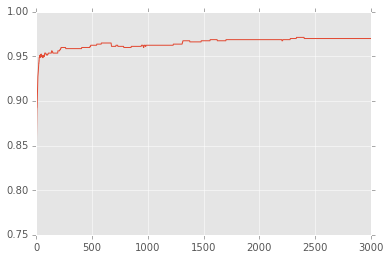

In [14]:
plt.plot(acc0)
print(np.amax(acc0))
print(acc0[-1])

In [25]:
def plot_epochs(az_angle, eleva):
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111, projection='3d')
    X, Y = np.meshgrid(np.linspace(0,200,200), np.linspace(0,10, 10))
    ax.plot_surface(np.linspace(0,100,100),fracerr, accu)
    ax.view_init(elev=eleva, azim=az_angle)

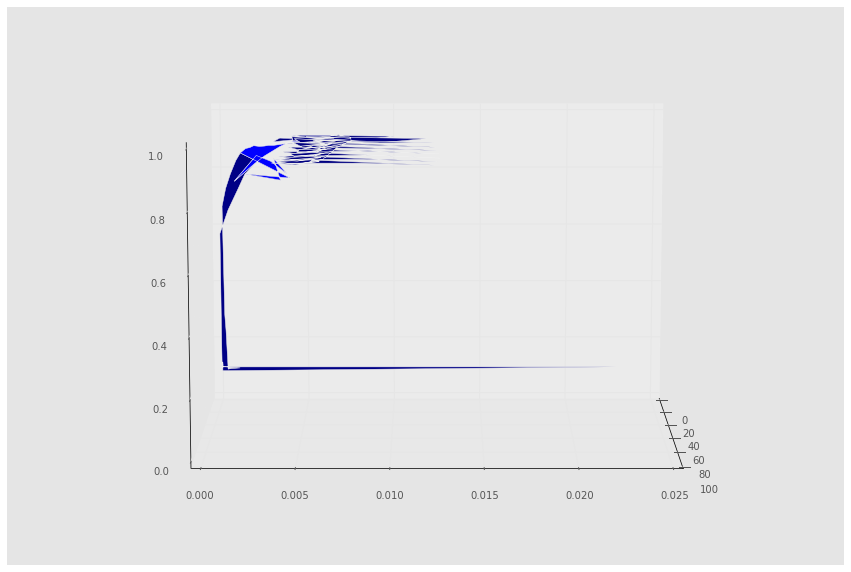

In [26]:
widg.interact(plot_epochs, az_angle=(0, 360, 1), eleva=(0,20,1))

In [26]:
acc_0 = []
acc_max = []
for i in range(100):
    acc_0.append(accu[i][0])
    acc_max.append(np.amax(accu[i]))
print(acc_0,acc_max)

([0.080402010050251257, 0.095477386934673364, 0.10175879396984924, 0.099246231155778894, 0.084170854271356788, 0.097989949748743713, 0.10427135678391959, 0.10301507537688442, 0.095477386934673364, 0.091708542713567834, 0.10678391959798995, 0.11180904522613065, 0.099246231155778894, 0.092964824120603015, 0.091708542713567834, 0.090452261306532666, 0.096733668341708545, 0.095477386934673364, 0.10175879396984924, 0.095477386934673364, 0.096733668341708545, 0.084170854271356788, 0.096733668341708545, 0.085427135678391955, 0.11306532663316583, 0.10804020100502512, 0.097989949748743713, 0.095477386934673364, 0.097989949748743713, 0.11180904522613065, 0.10175879396984924, 0.094221105527638196, 0.099246231155778894, 0.087939698492462318, 0.10301507537688442, 0.090452261306532666, 0.099246231155778894, 0.1092964824120603, 0.11180904522613065, 0.10427135678391959, 0.10301507537688442, 0.091708542713567834, 0.091708542713567834, 0.089195979899497485, 0.11306532663316583, 0.094221105527638196, 0.0

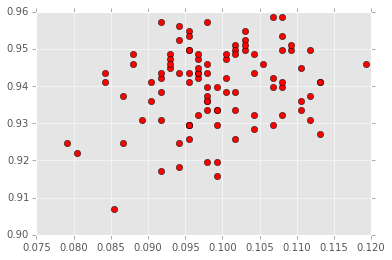

In [27]:
plt.plot(acc_0, acc_max, "ro")

In [28]:
print(sts.mstats.normaltest(acc_0),sts.mstats.normaltest(acc_max))

((0.0075995457262671151, 0.99620743713875803), (5.7055548972934353, 0.057683884149624019))


In [29]:
sts.pearsonr(acc_0, acc_max)

(0.2167868619167424, 0.030277070206115406)

In [31]:
np.savetxt("Accuracy_Data_run_17.dat", zip(acc_0, acc_max))